In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

plt.style.use("seaborn-v0_8-notebook")

_**Proposition:**_ Let $U$ ba a $U[0,1]$ random variable. For any continuous distribution function $F$
the random variable $X$ defined by $$X=F^{-1}(U)$$ has distribution $F$. [$F^{-1}$ is defined to be that value of $x$ such that $F(x)=u$]

# Exponential distribution

$x\sim exp(\lambda)$

i.e. $f(x,\lambda) = \lambda e^{-\lambda x}$ for $X\ge 0$ and $0$ otherwise

Let $\lambda = 5$

In [31]:
lam = 2


def Exp_dis(x, lam):  # x +
    return lam * np.exp(-lam * x)

Now, $F(x, \lambda) = 1-e^{-\lambda x}$

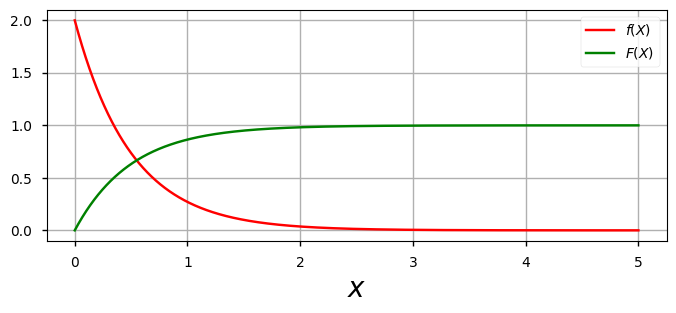

In [34]:
def CDF_Exp(x, lam):
    return 1 - np.exp(-lam * x)


x = np.linspace(0, 5, 10000)
plt.figure(figsize=(8, 3))
plt.plot(x, Exp_dis(x, lam), "red", label="$f(X)$")
plt.plot(x, CDF_Exp(x, lam), "green", label="$F(X)$")
plt.xlabel("$x$", fontsize=20)
plt.legend()
plt.grid()
plt.show()

now, $F^{-1}(y) = - \frac{\ln(1-y)}{\lambda}$

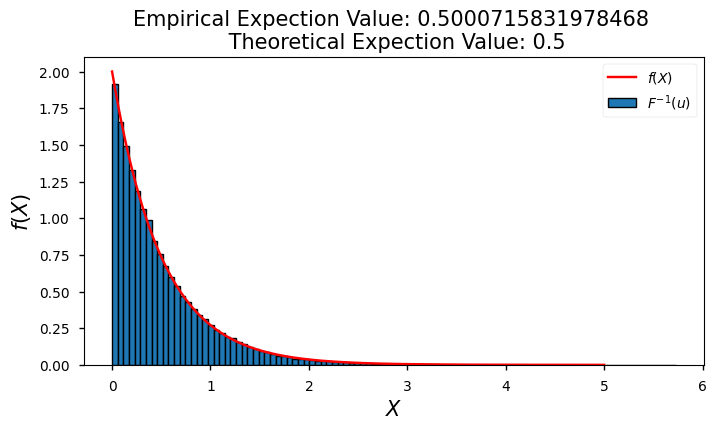

In [41]:
def INV_CDF_Exp(y, lam):
    return -np.log(1 - y) / lam


Us = np.random.uniform(size=100000)
random_exp_varable = INV_CDF_Exp(Us, lam)

exp_exptcion = sum(random_exp_varable)/len(random_exp_varable) 

plt.figure(figsize=(8, 4))
plt.plot(x, Exp_dis(x, lam), color="red", label="$f(X)$")
plt.hist(
    random_exp_varable,
#    histtype="step",
    linewidth=1,
    density="norm",
    edgecolor="black",
    bins=100,
    label="$F^{-1}(u)$",
)
plt.legend()
# plt.grid()
plt.ylabel("$f(X)$",fontsize=15)
plt.xlabel("$X$",fontsize=15)
plt.title(f"Empirical Expection Value: {exp_exptcion} \n Theoretical Expection Value: {1/lam}",fontsize=15)
plt.show()

# Gamma distribution

$Y\sim G(n,\lambda)$

To generate $Y$, first we generate $x_i \sim exp(\lambda)$ then $Y=\sum_1^n x_i\sim G(n, \lambda)$

we take $\lambda = 5$ and $n=10$

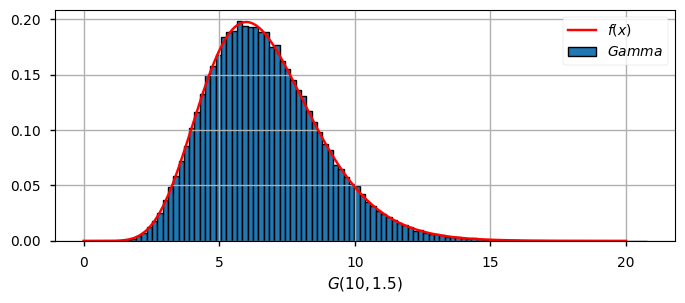

In [115]:
LAM = 1.5
N = 10


def Gamma_dis(x, n, lam):
    return lam**n * x ** (n - 1) * np.exp(-lam * x) / float(math.factorial(n - 1))


def Gamma_rv(n, lam):
    Us = np.random.uniform(size=n)
    Exp_rv = -np.log(1 - Us) / lam
    return Exp_rv.sum()


G_man = []
for _ in range(100000):
    G_man.append(Gamma_rv(N, LAM))

x = np.linspace(0, 20, 100000)
plt.figure(figsize=(8, 3))
plt.plot(x, Gamma_dis(x, N, LAM), color="red", label="$f(x)$")
plt.hist(
    G_man,
    edgecolor="black",
    density="norm",
    linewidth=1,
    bins=100,
    label="$Gamma$",
)
plt.legend()
plt.grid()
plt.xlabel(f"$G({N},{LAM})$")
plt.show()

# Standard Normal Distribution

### Rejection Method

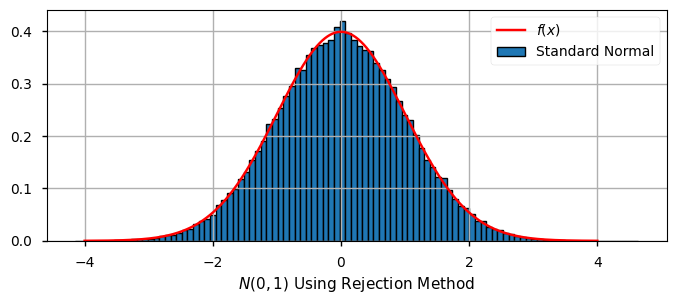

In [100]:
def Std_Normal_Rejection():
    while True:
        u1 = np.random.uniform()
        u2 = np.random.uniform()
        y1 = -np.log(1 - u1)
        y2 = -np.log(1 - u2)
        if y2 >= (y1 - 1) ** 2 / 2:
            y = y1
            U = np.random.uniform()
            if U <= 1 / 2:
                return y
            else:
                return -y


Zs = []
for _ in range(100000):
    Zs.append(Std_Normal_Rejection())

x = np.linspace(-4,4,100000)
plt.figure(figsize=(8, 3))
plt.plot(x,Std_Normal_Dis(x),"red",label="$f(x)$")
plt.hist(
    Zs,
    edgecolor = "black",
    density="norm",
    linewidth=1,
    bins=100,
    label="Standard Normal",
)
plt.legend()
plt.grid()
plt.xlabel("$N(0,1)$ Using Rejection Method")
plt.show()